# Analysing Historical Cultures 2

Let's get started with the second session on historical cultures. We will explore many more textual analysis techniques. Load the required libraries first by running the next cell.

In [1]:
#Keep cell

import pandas as pd
import numpy as np
import sca


Have you heard about the Google Ngram Viewer, which plots frequencies of words using a yearly count in sources printed between 1500 and 2008 in Google’s book corpora? You can try it here: https://books.google.com/ngrams. It has created quite an excitement in the digital methods world. Check out http://firstmonday.org/ojs/index.php/fm/article/view/5567/5535. 

We can use it to compare, for example, the difference in frequencies of the words hacker and programmer between 1950 and 2000. 

We start with hacker and use our custom function google_ngram. Please, run `hacker_df = sca.google_ngram('hacker', 1950, 2001)` to get the ngram for hacker between 1950 and 2001. Also, print out the first couple of rows.

In [2]:
hacker_df = sca.google_ngram('hacker', 1950, 2001)
hacker_df.head()

,hacker,year
0,1.127283e-08,1950
1,1.962954e-08,1951
2,2.526905e-08,1952
3,2.282019e-08,1953
4,3.322656e-08,1954


Let's plot the outcome and you will see that there is an increased talk about hacker since the 1950s. Type in `hacker_df.plot(x='year', y ='hacker')`.

<AxesSubplot:xlabel='year'>

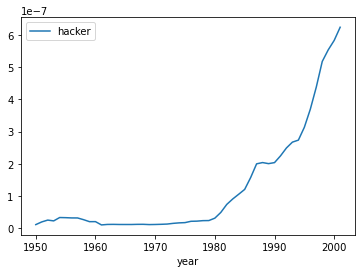

In [3]:
hacker_df.plot(x='year', y ='hacker')

Can you also do the same for the term 'programmer'? Use the next cell to create programmer_df and plot it ... 

You should see that interest in programmers seem to be declining from the late 1980s.

<AxesSubplot:xlabel='year'>

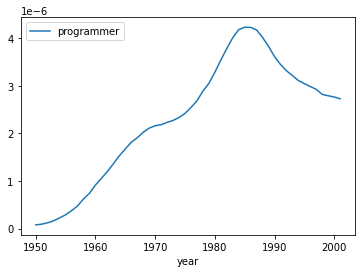

In [4]:
programmer_df = sca.google_ngram('programmer', 1950, 2001)

programmer_df.plot(x='year', y ='programmer')

Now, we want to plot them together. We will use programmer_df and add a column with the hacker information. Run `programmer_df['hacker'] = hacker_df['hacker']`.

In [5]:
programmer_df['hacker'] = hacker_df['hacker']

You can plot all columns in the data frame by omitting the y-axis when calling plot. Try `programmer_df.plot(x='year')`.

<AxesSubplot:xlabel='year'>

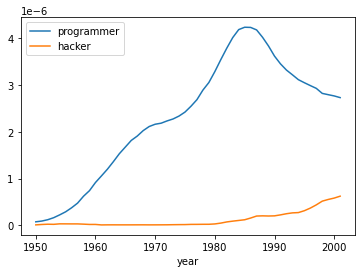

In [6]:
programmer_df.plot(x='year')

Can you compare the popularity of monarchies and democracies from 1500 to 2000? 

In the cell below create a data frame democracy_monarchy_df with google_ngram('democracy', 1500, 2000). Then, add a column monarchy to include the monarchy counts.

In [7]:
democracy_monarchy_df = sca.google_ngram('democracy', 1500, 2000)
democracy_monarchy_df['monarchy'] = sca.google_ngram('monarchy', 1500, 2000)['monarchy']

democracy_monarchy_df.tail()

,democracy,year,monarchy
496,0.000029,1996,0.000004
497,0.000029,1997,0.000004
498,0.000029,1998,0.000004
499,0.000030,1999,0.000004
500,0.000030,2000,0.000004


Please, plot democracy_monarchy_df.

<AxesSubplot:xlabel='year'>

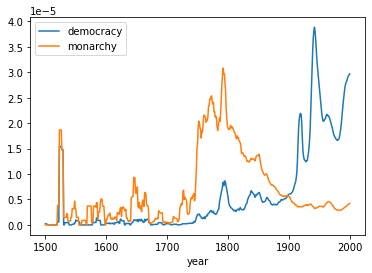

In [8]:
democracy_monarchy_df.plot(x='year')

There is a lot going on here but democracy seems to be winning. 

Let’s move on to a final example. If you have done a little bit of research on the Holocaust, you might know that there are on-going debates on whether to call it Shoah or Holocaust (https://en.wikipedia.org/wiki/Names_of_the_Holocaust). Rewrite the last example democracy_monarchy_df with shoah instead of democracy and holocaust instead of monarchy. You can use one cell.

<AxesSubplot:xlabel='year'>

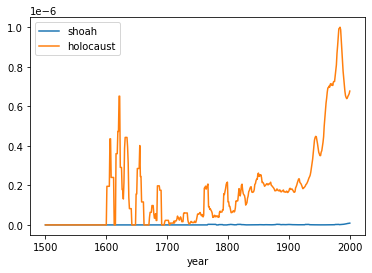

In [9]:
shoah_holocaust_df = sca.google_ngram('shoah', 1500, 2000)
shoah_holocaust_df['holocaust'] = sca.google_ngram('holocaust', 1500, 2000)['holocaust']

shoah_holocaust_df.plot(x = 'year')

So, despite the efforts to popularise the Hebrew word Shoah, Holocaust is still far more commonly used. Frequency has proven to be a good indicator of the development and importance of ideas. But it is not the only text analysis tool that we can use to derive ideas from documents. 

Another commonly used text mining tool is information extraction (https://en.wikipedia.org/wiki/Information_extraction). With information extraction, we can retrieve ideas and concepts directly from texts.

We would like to concentrate on the information extraction service https://spacy.io that has a great Python toolkit. To get a feeling about what we are trying, go to https://explosion.ai/demos/displacy-ent and try a few texts. 

Great stuff, no? Who, what, where and when are very important questions in social and cultural research and named entity exraction seems to provide a way to address them. 

First, load the library with `import spacy`.

In [10]:
import spacy

Spacy comes with various pipelines that create the extractions. We will use en_core_web_sm, a small English pipeline trained on written web text (blogs, news, comments). Type in `nlp = spacy.load('en_core_web_sm')`.

In [11]:
nlp = spacy.load('en_core_web_sm')

We will use this example also to introduce another important skill for text analysis, which is reading in external (text) files. https://www.w3schools.com/python/python_file_open.asp presents a nice tutorial how to read an external text file. Try `file = open('data/20070123.txt', 'r')` to open for read-only a file at the location 'data/20070123.txt'.

In [12]:
file = open('data/20070123.txt', 'r')

Next, read the text from the file with `text = file.read()`. In the same cell also type in `text[:100]` to print out the first 100 characters of the text.

In [13]:
text = file.read()
text[:100]

'George W. Bush\nJanuary 23, 2007\nTO THE CONGRESS OF THE UNITED STATES:\nThank you very much. Tonight, '

It is clearly Bush's State of the Union. 

Spacy's nlp command extracts all the linguistic features for us from a text. There are many and you will see an example of one part soon. It is best to learn by doing here.

Datacamp has made a nice cheat sheet: http://datacamp-community-prod.s3.amazonaws.com/b5685b85-c4de-4987-926d-b999d0f5a8b6.

Run `doc = nlp(text)`.

In [14]:
doc = nlp(text)

You can display the output by running the cell below.

In [15]:
#Keep cell

spacy.displacy.render(doc, style='ent', jupyter=True)

What you can see here, are only the extracted entities like person, organisation, etc. Spacy actually targets many more linguistic features.

Spacy can also visualise dependency parsing (https://spacy.io/usage/visualizers), which is another popular technique, as it shows nouns, subjects, etc. and how they relate. Run the cell below.

In [16]:
#Keep cell

spacy.displacy.render(nlp("This is a sentence."), style='dep', jupyter=True)

But we want to focus on named entity extraction and see what we can do with these entities. Let's check what kind of entities we can find in Bush's speech. Type in:
```
[(entity.text, entity.label_) for entity in doc.ents][:20]
```
to parse through the entities of the doc (doc.ents) and retrieve the first 20 of their texts and labels (https://spacy.io/usage/linguistic-features#named-entities).

In [17]:
[(entity.text, entity.label_) for entity in doc.ents][:20]

[('George W. Bush\n', 'PERSON'),
 ('January 23, 2007\nTO', 'DATE'),
 ('THE UNITED STATES', 'GPE'),
 ('Tonight', 'TIME'),
 ('first', 'ORDINAL'),
 ('Madam Speaker', 'PERSON'),
 ('his day', 'DATE'),
 ("Thomas D'Alesandro", 'PERSON'),
 ('Jr.', 'ORG'),
 ('Baltimore', 'GPE'),
 ('Maryland', 'GPE'),
 ('Presidents Roosevelt', 'PERSON'),
 ('Truman', 'PRODUCT'),
 ('Nancy', 'PERSON'),
 ('tonight', 'TIME'),
 ('the House of Representatives', 'ORG'),
 ('Madam Speaker', 'PERSON'),
 ('Two', 'CARDINAL'),
 ('House', 'ORG'),
 ('Senate', 'ORG')]

What next? How about mapping the locations? First, let's take a look at them ('GPE' or 'Geopolitical Entity') with `[ent for ent in doc.ents if ent.label_ in ['GPE']][:20]`. There are also 'LOC' entitites in Spacy but we ignore those for the time being.

In [18]:
[ent for ent in doc.ents if ent.label_ in ['GPE']][:20]

[THE UNITED STATES,
 Baltimore,
 Maryland,
 America,
 Washington,
 D.C.,
 America,
 America,
 States,
 America,
 America,
 America,
 America,
 America,
 Washington,
 the United States,
 America,
 America,
 the United States,
 America]

`sca.locations_spacy(doc)` is a little custom function that maps them. This might take a while, as it needs to first geocode them with Openstreetmap: https://www.geoapify.com/openstreetmap-geocoding. Try it.

In [19]:
sca.locations_spacy(doc)

Extracting entities can be a useful in the automatic analysis of texts. We can use the entities to understand content better or even provide effective links between different texts. If we know that two documents are about the same place, for instance, it seems logical that there is a link between them based on the place. Because I have worked a lot with computational archives, where we want to link collections and documents, I have done a lot of work in information extraction – especially with heterogeneous historical material. I have also been involved with analysing testimonies and other oral histories. Here, a typical question is the kind of sentiment a memory expresses. Is it a positive or negative memory? If so to what degree? These are the kinds of questions that automated sentiment analysis can answer, which we cover next.

Sentiment analysis aims to evaluate emotions and other highly subjective expressions in a text. Commonly this is applied to finding out whether tweets, movie reviews, etc. express a positive or negative sentiment. In fact, later in the module, when we discuss prediction models, we will look into an example based on movie reviews. Generally speaking, sentiment analysis is done using a so-called supervised approach, where a human annotates a collection with the sentiments of a document and the computer tries to learn about the decisions on sentiments of that human.

We will use an unsupervised approach. Here, the computer learns by itself. We have already seen an example of unsupervised learning when we clustered US Congress voting behaviour. Some people argue that sentiment analysis should never be done as unsupervised learning. Gary King, for instance, consistently warns us that this is one of the worst possible mistakes. Check out his website http://gking.harvard.edu/. He should be interesting for us.

But first we have to do our corpus work again. Run the cell below to load the data frame of the SOTU texts (sotu_df) and prepare relevant NLTK stuff.

In [20]:
#Keep cell

import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_ = list(stopwords.words('english'))

#nltk.download('opinion_lexicon')

sotu_df = pd.read_csv('data/sotu_all.csv')

To clean the texts, we start with tokenizing it, making each text into a list of words. Do you remember how? A good way would be `sotu_words = [word_tokenize(text) for text in sotu_texts]`.

In [21]:
sotu_words = [word_tokenize(text) for text in list(sotu_df['speechtext'])]

With `sotu_words = [[word for word in word_list if word.isalpha()] for word_list in sotu_words]`, we remove all the non-alphabet letters. As you will have noticed we use a list comprehension withing a list comprehension. The outer one goes over the list of list that is sotu_words, while the inner one checks for each word whether it is an alpha(). 

You will also see something like this for double comprehensions: `sotu_words = [word for word_list in sotu_words for word in word_list if word.isalpha()]`. But I find this less readable as you have to start with the outer list and then move on to the innter list.

In [22]:
sotu_words = [[word for word in word_list if word.isalpha()] for word_list in sotu_words] 

Finally, we remove stop words with `sotu_words = [[word for word in word_list if word not in stopwords_] for word_list in sotu_words]`.

In [23]:
sotu_words = [[word for word in word_list if word not in stopwords_] for word_list in sotu_words] 

Now it's time to join the texts again. Admire the power of list comprehensions and type `sotu_df['speechtext_clean'] = [' '.join(word) for word in sotu_words]`. This creates a new column speechtext_clean in sotu_df with the cleaned texts.

In [24]:
sotu_df['speechtext_clean'] = [' '.join(word) for word in sotu_words]

Check that everything is wonderful with `sotu_df.head()`.

In [25]:
sotu_df.head()

,rownames,speechtext,year,date,speechtext_clean
0,17900108.html,Fellow-Citizens of the Senate and House of Re...,1790,17900108,Senate House Representatives I embrace great s...
1,17901208.html,Fellow-Citizens of the Senate and House of Re...,1790,17901208,Senate House Representatives In meeting I feel...
2,17911025.html,Fellow-Citizens of the Senate and House of Re...,1791,17911025,Senate House Representatives In vain may expec...
3,17921106.html,Fellow-Citizens of the Senate and House of Re...,1792,17921106,Senate House Representatives It abatement sati...
4,17931203.html,Fellow-Citizens of the Senate and House of Re...,1793,17931203,Senate House Representatives Since commencemen...


We use the dictionary-based sentiment analysis approach.  It uses a lexicon of positive and negative words and then simply counts the number of times positive and negative words appear in a text. If there are more positive words than negative words, the text will get an overall positive sentiment, otherwise a negative one.

For the dictionary-based approach, we need to prepare a lexicon of positive and negative words. NLTK has one for us from: Minqing Hu and Bing Liu. "Mining and summarizing customer reviews", Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining (KDD-04), Aug 22-25, 2004, Seattle, Washington, USA. But there are many more online: https://stackoverflow.com/questions/4188706/sentiment-analysis-dictionaries. 

Run the next cell to create lists of positive and negative words: pos_words, neg_words. It also prints out the first ten of each list. As you can see they can be quite subjective. 'disruption' can be a positive word in business language. 

We have so many questions now, which we cannot answer immediately. Why do you think a list of dictionary words might be dependent on language usage? Does the list of positive and negative words therefore change over time? What does this mean for our historical comparison? And many more ...

In [26]:
# Keep cell

from nltk.corpus import opinion_lexicon

pos_words = list(set(opinion_lexicon.positive()))
neg_words = list(set(opinion_lexicon.negative()))

list(zip(pos_words, neg_words))[:10]

[('flourishing', 'snappishly'),
 ('lustrous', 'improper'),
 ('robust', 'clamor'),
 ('tranquil', 'discouragement'),
 ('precisely', 'wrinkled'),
 ('fecilitous', 'split'),
 ('cozy', 'cliched'),
 ('examplary', 'dies'),
 ('productive', 'gimmicked'),
 ('prominence', 'malevolently')]

Now, for the hard part. We must define a function sentiment_score that takes a text and returns a sentiment score. It will tokenize the text first with `words = [word.lower() for word in word_tokenize(text)]`. Then, go through all the words and check wether they are in the list of positive words. If so, it should add 1 to the score. If not, it will check wether the words are in the negative list and substract 1 from the score. Otherwise, the words will be ignored. 

Of course, you can formulate this function yourself or just type in:
```
def sentiment_score(text):
    score = 0
    words = [word.lower() for word in word_tokenize(text)]
    for word in words:
        if word in pos_words:
            score += 1
        elif word in neg_words:
            score -= 1
    return score
```

In [27]:
def sentiment_score(text):
    score = 0
    words = [word.lower() for word in word_tokenize(text)]
    for word in words:
        if word in pos_words:
            score += 1
        elif word in neg_words:
            score -= 1
    return score

With Pandas' apply (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), you can easily apply sentiment_score to speechtext_clean. It calls function on values of a series. Run `sotu_df['sentiment_score'] = sotu_df['speechtext_clean'].apply(sentiment_score)`.

This takes a little while ...

In [28]:
sotu_df['sentiment_score'] = sotu_df['speechtext_clean'].apply(sentiment_score)

You end up with a new column sentiment_score in sotu_df, which contains the scores. Let’s plot a histogram of the scores’ distribution with `sotu_df.hist(column='pos_score')`. The sentiments are seemingly very postive. We even have a document with a score of ~700. What does this mean? And why is this not surprising given that this is a state of the union corpus?

array([[<AxesSubplot:title={'center':'sentiment_score'}>]], dtype=object)

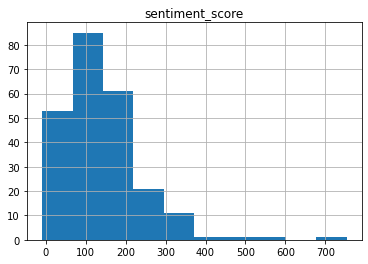

In [29]:
sotu_df.hist(column='sentiment_score')

Finally, let’s quickly plot the sentiments over time with `sotu_df.plot(x='year', y='sentiment_score', kind='scatter')`.

We again see that there are only very few speeches that are close to 0 or even negative. 

<AxesSubplot:xlabel='year', ylabel='sentiment_score'>

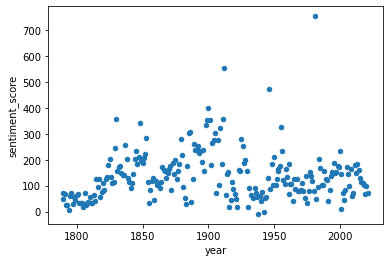

In [30]:
sotu_df.plot(x='year',y='sentiment_score', kind='scatter')

Looking at the Figures, we begin to wonder how a speech can have scores of over 500 ... Maybe we did something wrong? 

We did indeed forget something, which we learned in the last session. The speeches are very different in length. If we then simply count the positive/negative words, it is much more likely that longer texts have more positive/negative words. 

In the language of text analysis, we have to normalize the scores. A simple but also crude way is to divide the score by the length of the speech. Last time, we had to create a document-term-matrix first, but we don't have to. Pandas also has a function str.split() that splits a text column into a list of words. Then, we can apply len() to get the length of that list. 

Run:
```
speech_lengths = sotu_df['speechtext_clean'].str.split().apply(len)
speech_lengths[:5]
```

In [31]:
speech_lengths = sotu_df['speechtext_clean'].str.split().apply(len)
speech_lengths[:5]

0     523
1     673
2    1117
3    1024
4     954
Name: speechtext_clean, dtype: int64

Create a new column 'sentiment_score_normalized' in sotu_df which will receive the values of sotu_df['sentiment_score'] / speech_lengths.

In [32]:
sotu_df['sentiment_score_normalized'] = sotu_df['sentiment_score'] / speech_lengths

Please, plot `sotu_df.hist(column='sentiment_score_normalized')`.

array([[<AxesSubplot:title={'center':'sentiment_score_normalized'}>]],
      dtype=object)

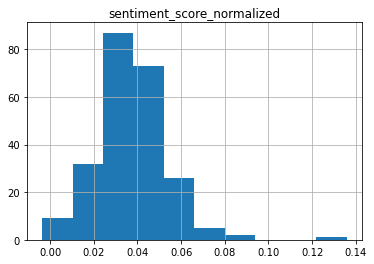

In [33]:
sotu_df.hist(column='sentiment_score_normalized')

Can you create a scatter plot with x='year' and y='sentiment_score_normalized'?

<AxesSubplot:xlabel='year', ylabel='sentiment_score_normalized'>

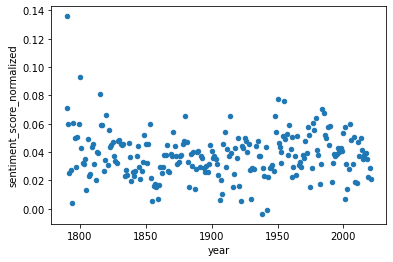

In [34]:
sotu_df.plot(x='year', y='sentiment_score_normalized', kind='scatter')

This does look very different from the non-normalized version. But which one is better? How can we find that out? 

We can compare it with the results with our trusted sentiment analyzer in NLTK. Check out: https://realpython.com/python-nltk-sentiment-analysis/

Run the cell below to analyze "Wow, NLTK is really powerful!".

In [35]:
#Keep the cell

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

The output of sia.polarity_scores is a dictionary of subscores. https://predictivehacks.com/how-to-run-sentiment-analysis-in-python-using-vader/ explains the output. The compound-key is what we are after. It is the combined score. 

Let's apply sia.polarity_scores to speechtext_clean, as we have done with our own function sentiment_score. Create `sia_scores = list(sotu_df['speechtext_clean'].apply(sia.polarity_scores))`.

In [36]:
sia_scores = list(sotu_df['speechtext_clean'].apply(sia.polarity_scores))

Again, this takes a while. It is faster though than our own simple attempt.

Next, we create a new column in sotu_df with the compound scores: `sotu_df['sentiment_score_sia'] = [s['compound'] for s in sia_scores]`. We again admire the power of list comprehensions, which allows to easily extract a particular key across a list.

In [37]:
sotu_df['sentiment_score_sia'] = [s['compound'] for s in sia_scores]

Please, plot `sotu_df.hist(column='sentiment_score_sia')`.

array([[<AxesSubplot:title={'center':'sentiment_score_sia'}>]],
      dtype=object)

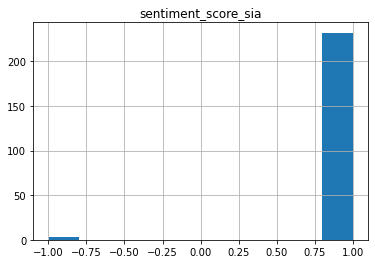

In [38]:
sotu_df.hist(column='sentiment_score_sia')

A very clear verdict. Most speeches - if not almost all - are positive. Let's plot the timeline with `sotu_df.plot(x='year', y='sentiment_score_sia', kind='scatter')`

<AxesSubplot:xlabel='year', ylabel='sentiment_score_sia'>

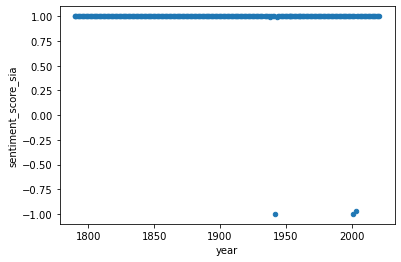

In [39]:
sotu_df.plot(x='year', y='sentiment_score_sia', kind='scatter')

The only negative speeches identified are around the time of the Second World War and around September 11th. We wonder a bit about this, as we also had other negative events in history like the First World War or the American Civil War. Might the sentiment dictionary we use not cover their negative languages? 

These are very binary outputs and don't help us much to understand how good/bad our own approach was. So, we create another column sentiment_score_sia2 in sotu_df, which contains the difference between 'pos' and 'neg' in sia_scores. Very much like our own approach.

Type in `sotu_df['sentiment_score_sia2'] = [s['pos'] - s['neg'] for s in sia_scores]`.

In [40]:
sotu_df['sentiment_score_sia2'] = [s['pos'] - s['neg'] for s in sia_scores]

To find out, whether sentiment_score_normalized agrees with sentiment_score_sia2, we can correlate the two with Pandas' corr() function. Run: `sotu_df['sentiment_score_normalized'].corr(sotu_df['sentiment_score_sia2'])`.

In [41]:
sotu_df['sentiment_score_normalized'].corr(sotu_df['sentiment_score_sia2'])

0.8072606357037301

There is a strong correlation.

What about the original sentiment_score? Run `sotu_df['sentiment_score'].corr(sotu_df['sentiment_score_sia'])`.

In [42]:
sotu_df['sentiment_score'].corr(sotu_df['sentiment_score_sia'])

0.14426738147314805

They are not correlated ...

Run the cell below to get the accuracy of our method if we take the NLTK output as the ground truth. 